In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold

In [ ]:
!gdown 10ZYABy60KXizWBbjrnkYZZIyED9BcWzc

Downloading...
From: https://drive.google.com/uc?id=10ZYABy60KXizWBbjrnkYZZIyED9BcWzc
To: /content/test.csv
100% 372k/372k [00:00<00:00, 102MB/s]


In [ ]:
!gdown 1cd_ZnhQZVGXQJ91Meeb-iQrADA-M7mGM

Downloading...
From: https://drive.google.com/uc?id=1cd_ZnhQZVGXQJ91Meeb-iQrADA-M7mGM
To: /content/train.csv
100% 805k/805k [00:00<00:00, 129MB/s]


In [ ]:
def read_data(data):
  if data == "train.csv":
    return pd.read_csv(data)
  elif data == "test.csv":
    return pd.read_csv(data)

In [ ]:
train_set = read_data("train.csv")

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_set.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
# makeing labels numeric
train_set.Transported = train_set.Transported.astype(int)

In [ ]:
for col in train_set.columns:
  x = set(train_set[col])
  if len(x)<10:
    print(f'{col} has {x} ')

HomePlanet has {'Europa', nan, 'Earth', 'Mars'} 
CryoSleep has {False, True, nan} 
Destination has {'TRAPPIST-1e', nan, '55 Cancri e', 'PSO J318.5-22'} 
VIP has {False, True, nan} 
Transported has {0, 1} 


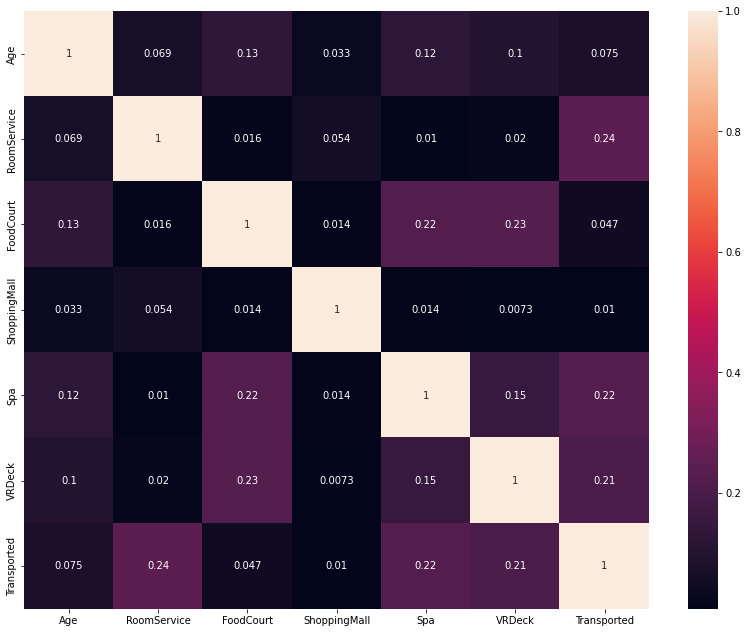

In [ ]:
fig = plt.figure(figsize=(14,11))
sns.heatmap(train_set.corr().abs(),annot=True)

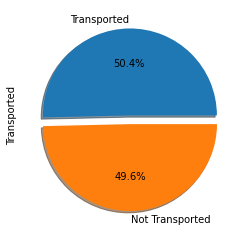

In [ ]:
train_set.Transported.replace({0:"Not Transported",1:"Transported"}).value_counts().plot.pie(explode=[0,0.1],
                                                                                                 autopct='%1.1f%%',shadow=True)

In [ ]:
def eng(data):
  #pass_id
  data['PassengerGroup'] = [i.split('_')[1] for i in data.PassengerId]
  data.drop(['PassengerId'],axis=1,inplace=True)
  #cabin
  data.Cabin = data.Cabin.fillna(data.Cabin.mode()[0])
  data['rCabin'] = [i.split('/')[0] for i in data.Cabin]
  # data['mCabin'] = [i.split('/')[1] for i in data.Cabin]
  data['lCabin'] = [i.split('/')[2] for i in data.Cabin]
  data.drop(['Cabin'],axis=1,inplace=True)
  #age
  data.Age = data.Age.fillna(data.Age.mean())
  #vip
  data.VIP = data.VIP.fillna(data.VIP.mode()[0])
  #cryosleep
  data.CryoSleep = data.CryoSleep.fillna(data.CryoSleep.mode()[0])
  #homeplanet
  data.HomePlanet = data.HomePlanet.fillna(data.HomePlanet.mode()[0])
  #destination
  data.Destination = data.Destination.fillna(data.Destination.mode()[0])
  #name
  data.drop(['Name'],axis=1,inplace=True)
  #others
  knn_Imputer = KNNImputer()
  lst = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
  #last_pre
  data[[i for i in lst]] = knn_Imputer.fit_transform(data[[i for i in lst]])
  data.CryoSleep = [1 if i == True else 0 for i in data.CryoSleep]
  data.VIP = [1 if i == True else 0 for i in data.VIP]
  spend = [i for i in (data.RoomService + data.FoodCourt + data.ShoppingMall + data.Spa + data.VRDeck)]
  Spend_Cat = []
  for i in spend:
    if i>=20000:
      Spend_Cat.append('High')
    elif i<20000 and i>=10000:
      Spend_Cat.append('Mild')
    else:
      Spend_Cat.append('Low')
  data['Spend_Cat'] = Spend_Cat
eng(train_set)

In [ ]:
train_set.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.827930,0.022892,223.947107,453.620775,172.575728,309.314299,301.334200,0.503624
std,0.476796,14.339054,0.149568,662.279571,1597.669661,598.407856,1125.899886,1134.487595,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,49.000000,82.000000,30.000000,77.000000,49.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [ ]:
train_set.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
PassengerGroup    0
rCabin            0
lCabin            0
Spend_Cat         0
dtype: int64

In [ ]:
def bar_plot(data,feature):
  sns.barplot(data=data,x=feature,y='Transported',ci=None)

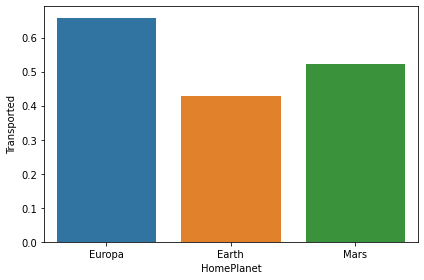

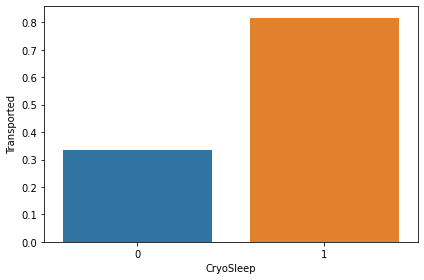

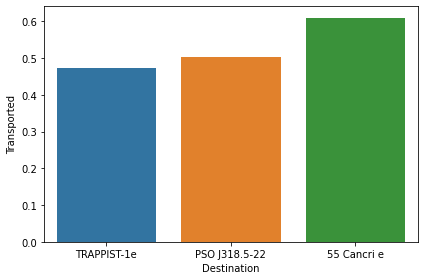

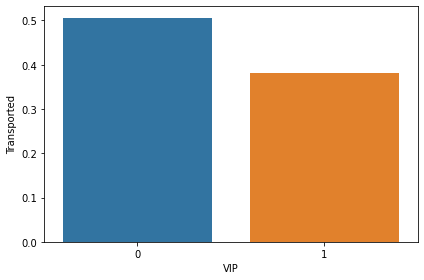

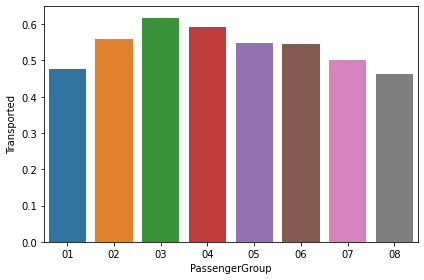

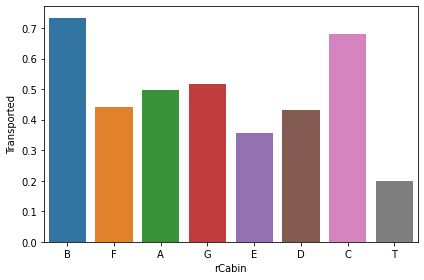

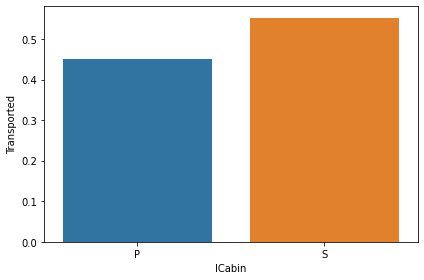

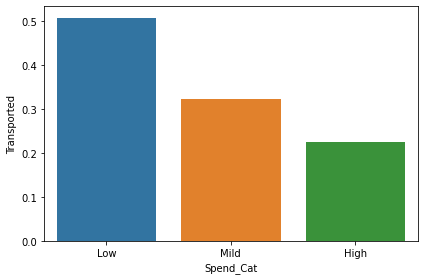

In [ ]:
feature_list = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','PassengerGroup', 'rCabin', 'lCabin','Spend_Cat']
for i in feature_list:
  fig = plt.figure(figsize=(6,4))
  bar_plot(train_set,i)
  plt.tight_layout()

In [ ]:
train_set

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerGroup,rCabin,lCabin,Spend_Cat
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,01,B,P,Low
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,01,F,S,Low
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,01,A,S,Mild
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,02,A,S,Low
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,01,F,S,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,01,A,P,Low
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,01,G,S,Low
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,01,G,S,Low
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,01,E,S,Low


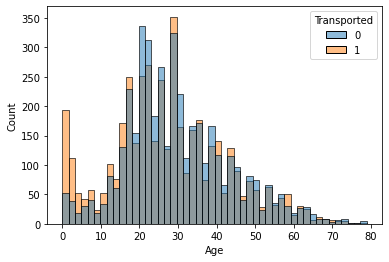

In [ ]:
sns.histplot(data=train_set,x='Age',hue='Transported')

In [ ]:
def age_10(data):
  data['Under_10'] = [1 if i<=10 else 0 for i in data.Age]
age_10(train_set)

In [ ]:
train_set = pd.get_dummies(train_set,drop_first=True)

In [ ]:
label = train_set.Transported
train_set.drop(['Transported'],axis=1,inplace=True)

In [ ]:
# from sklearn.manifold import TSNE
# tSNE = TSNE(3)
# train_data_tsne = tSNE.fit_transform(train_set)

In [ ]:

# plt.scatter(train_data_tsne[:,0],train_data_tsne[:,1],cmap='plasma',c=label)

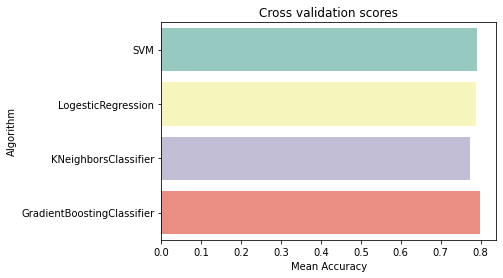

In [ ]:
svm = SVC(C=5000)
knn = KNeighborsClassifier(5)
lr = LogisticRegression(solver='liblinear', max_iter=500)
gb = GradientBoostingClassifier()
LST = [svm,lr,knn,gb]
cv_score=[]
for i in LST:
  score = cross_val_score(i,train_set,label,scoring='accuracy')
  cv_score.append(score.mean())
cv_res = pd.DataFrame({"CrossValMeans":cv_score,"Algorithm":["SVM","LogesticRegression","KNeighborsClassifier","GradientBoostingClassifier"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
# svm = SVC(C=10000)
gb = GradientBoostingClassifier()
gb.fit(train_set,label)
# score = cross_val_score(svm,train_set,label,cv=5,scoring='accuracy')
# score.mean()

GradientBoostingClassifier()

In [ ]:
test_set = read_data("test.csv")

In [ ]:
Test_Id = test_set.PassengerId

In [ ]:
eng(test_set)

In [ ]:
age_10(test_set)

In [ ]:
test_set = pd.get_dummies(test_set,drop_first=True)

In [ ]:
pred = gb.predict(test_set)

In [ ]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
predictions = pd.Series(pred.astype(bool), name="Transported")

results = pd.concat([Test_Id,predictions],axis=1)

results.to_csv("submission.csv",index=False)